In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math
from numpy.linalg import norm
from numpy import arccos, dot, pi, cross

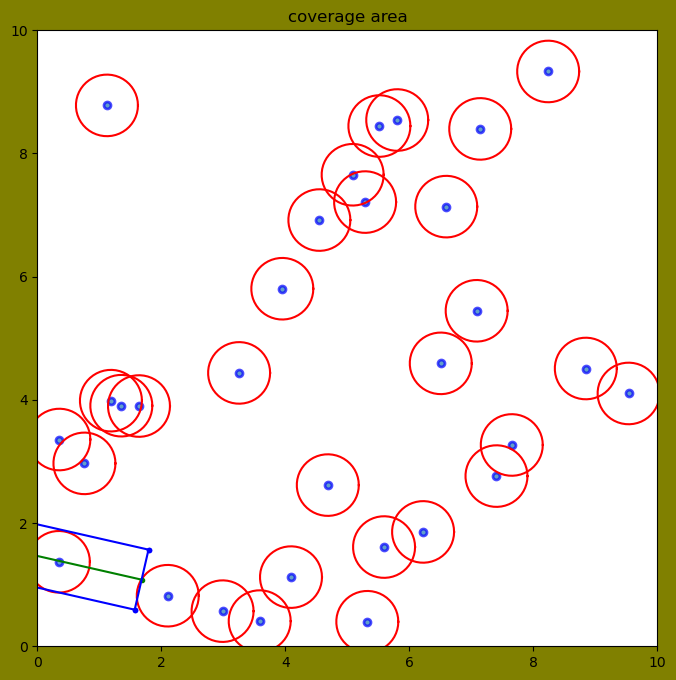

LoS blocked
Вероятность блокировки:  0.62
Blocking probability-2:  0.5934303402594008


In [20]:
# Исходные данные
guard_size = 10  # Размер квадратной области
poisson_lam_block = 0.3  # Плотность возникновения блокаторов
radius_block = 0.5
distance_Tx_Rx = 3

# Рисуем круг
def plot_circle(x, y, r):
    angles = np.linspace(0, 2*np.pi, 50)
    x_cir = x + r * np.cos(angles)
    y_cir = y + r * np.sin(angles)
    plt.plot(x_cir, y_cir, 'red')

# Инициализация Пуассоновского точечного процесса
def poisson_point_process(lambda0, area_size):
    Number_block = np.random.poisson(lambda0 * area_size**2)
    x = np.random.uniform(0, area_size, size=Number_block)
    y = np.random.uniform(0, area_size, size=Number_block)
    return x, y

# Функция для прямоугольника
def paint_rectangle(x_point_1, y_point_1, x_point_2, y_point_2, angle):
    difference_angle = 2 * np.pi - angle
    reverse_angle = np.pi / 2 - difference_angle
    opposite_angle = reverse_angle + np.pi
    x_rectang_A = x_point_1 + radius_block * np.cos(opposite_angle)
    y_rectang_A = y_point_1 + radius_block * np.sin(opposite_angle)
    x_rectang_B = x_point_1 + radius_block * np.cos(reverse_angle)
    y_rectang_B = y_point_1 + radius_block * np.sin(reverse_angle)
    x_rectang_C = x_point_2 + radius_block * np.cos(reverse_angle)
    y_rectang_C = y_point_2 + radius_block * np.sin(reverse_angle)
    x_rectang_D = x_point_2 + radius_block * np.cos(opposite_angle)
    y_rectang_D = y_point_2 + radius_block * np.sin(opposite_angle)
    return x_rectang_A, y_rectang_A, x_rectang_B, y_rectang_B, x_rectang_C, y_rectang_C, x_rectang_D, y_rectang_D

# Расстояние точки C до прямой AB в 2D
def distance_point_line(A, B, C):
    return abs((B[0]-A[0])*(A[1]-C[1]) - (A[0]-C[0])*(B[1]-A[1])) / norm(B-A)

# считаем расстрояние
def check_distance(A, B, C):
    CA = (C - A) / norm(C - A)
    BA = (B - A) / norm(B - A)
    CB = (C - B) / norm(C - B)
    AB = (A - B) / norm(A - B)
    
    if np.arccos(np.clip(np.dot(CA, BA), -1, 1)) > 1:
        return norm(C - A)
    if np.arccos(np.clip(np.dot(CB, AB), -1, 1)) > 1:
        return norm(C - B)
    
    return distance_point_line(A, B, C)

# Блокировку
def crossing(list_point, point_1, point_2):
    for circle in list_point:
        if np.round(check_distance(np.array(point_1), np.array(point_2), np.array(circle)), 1) <= radius_block:
            return True
    return False

# Генерация случайных блокаторов и прямой линии
x, y = poisson_point_process(poisson_lam_block, guard_size)
x1 = np.random.uniform(0, guard_size)
y1 = np.random.uniform(0, guard_size)
angle = np.random.uniform(0, 2*np.pi)
x2 = x1 + distance_Tx_Rx * np.cos(angle)
y2 = y1 + distance_Tx_Rx * np.sin(angle)

x_rectang_A, y_rectang_A, x_rectang_B, y_rectang_B, x_rectang_C, y_rectang_C, x_rectang_D, y_rectang_D = paint_rectangle(x1, y1, x2, y2, angle)

plt.figure(dpi=100, figsize=(8,8), facecolor='olive')
plt.title('coverage area')
plt.plot(x, y, '.', alpha=0.7, label="blockers", lw=5, mec='b', mew=2, ms=10)
for i in range(len(x)):
    plot_circle(x[i], y[i], radius_block)

plt.plot([x1, x2], [y1, y2], '.-g')
plt.plot([x_rectang_A, x_rectang_B], [y_rectang_A, y_rectang_B], '.-b')
plt.plot([x_rectang_A, x_rectang_D], [y_rectang_A, y_rectang_D], '.-b')
plt.plot([x_rectang_B, x_rectang_C], [y_rectang_B, y_rectang_C], '.-b')
plt.plot([x_rectang_D, x_rectang_C], [y_rectang_D, y_rectang_C], '.-b')
plt.xlim(0, guard_size)
plt.ylim(0, guard_size)
plt.show()

list_point_array = np.column_stack((x, y))
point_1 = [x1, y1]
point_2 = [x2, y2]

if crossing(list_point_array, point_1, point_2):
    print('LoS blocked')
else:
    print('LoS is not blocked')

# Имитационное моделирование
N = 1000
summa = 0
for i in range(N):
    x, y = poisson_point_process(poisson_lam_block, guard_size)
    x1 = np.random.uniform(0, guard_size)
    y1 = np.random.uniform(0, guard_size)
    angle = np.random.uniform(0, 2*np.pi)
    x2 = x1 + distance_Tx_Rx * np.cos(angle)
    y2 = y1 + distance_Tx_Rx * np.sin(angle)
    
    list_point_array = np.column_stack((x, y))
    point_1 = [x1, y1]
    point_2 = [x2, y2]
    
    if crossing(list_point_array, point_1, point_2):
        summa += 1

print('Вероятность блокировки: ', summa / N)

# Вероятность блокировки по аналитической формуле
S = 2 * radius_block * distance_Tx_Rx
lamb = poisson_lam_block * S
probability = 1 - np.exp(-lamb)
print('Blocking probability-2: ', probability)
